In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import seaborn as sns

In [2]:
track_data = pd.read_csv('misc/music_info.csv')
len(track_data)
track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [3]:
user_data = pd.read_csv('misc/user_listening_hist.csv')
len(user_data)
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB


## Data Pre-processing
1. Drop rows in the user listening history table where the listening count is only 1.

In [4]:
# User listening data set
user_data = user_data[user_data.playcount != 1]
user_data.head()

,track_id,user_id,playcount
8,TRAAHSY128F147BB5C,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2
20,TRCTFBL128F42934F3,85c1f87fea955d09b4bec2e36aee110927aedf9a,2
21,TRPGYLT128F428AD02,85c1f87fea955d09b4bec2e36aee110927aedf9a,3
24,TRWCEKE128F93191BE,bd4c6e843f00bd476847fb75c47b4fb430a06856,2
30,TRBFXMJ12903CB50F6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,2


In [5]:
track_data = track_data.drop(['spotify_preview_url', 'genre'], axis = 1)
track_data.head()

,track_id,name,artist,spotify_id,tags,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",2004,237026,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [6]:
track_data['time_signature'].unique()

array([4, 3, 5, 1, 0], dtype=int64)

In [7]:
user_data = user_data.groupby('user_id').filter(lambda x : len(x)>20)

In [8]:
user_data['user_id'].nunique()

25343

In [9]:
len(user_data)

806745

In [10]:
user_data.head()

,track_id,user_id,playcount
121,TRLATHU128F92FC275,5a905f000fc1ff3df7ca807d57edb608863db05d,11
122,TRMKFPN128F42858C3,5a905f000fc1ff3df7ca807d57edb608863db05d,2
125,TRGAOLV128E0789D40,5a905f000fc1ff3df7ca807d57edb608863db05d,2
126,TREAQSX128E07818CA,5a905f000fc1ff3df7ca807d57edb608863db05d,2
127,TRUMDRI128F424FEFC,5a905f000fc1ff3df7ca807d57edb608863db05d,3


In [14]:
track_data.to_csv('misc/processed_music_info_extended.csv', index=False)
user_data.to_csv('misc/processed_user_listening_hist.csv', index=False)

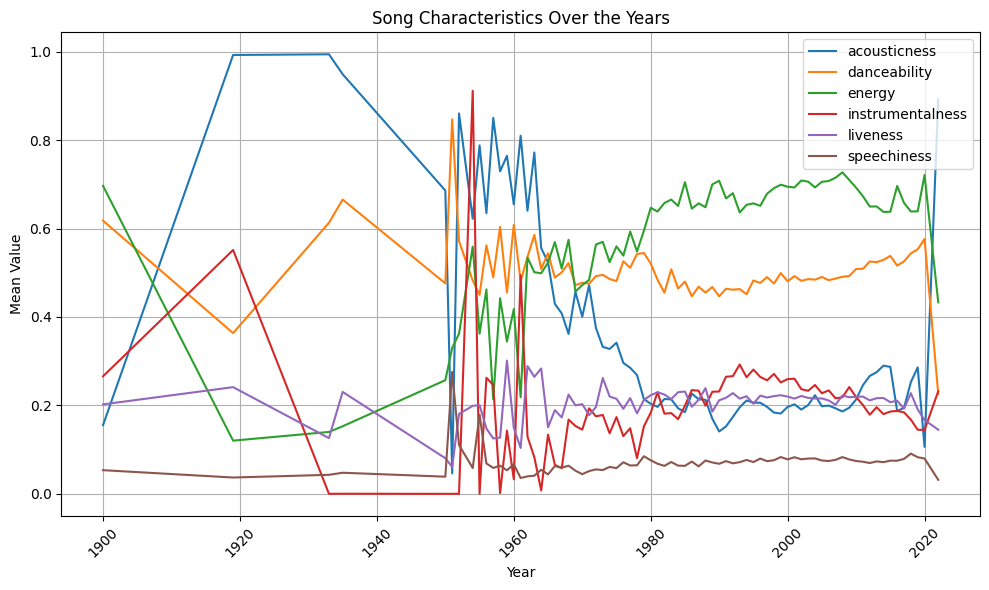

In [16]:
characteristics = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
plt.figure(figsize=(10, 6))

for characteristic in characteristics:
    plt.plot(track_data.groupby('year')[characteristic].mean(), linestyle='-', label=characteristic)

plt.title('Song Characteristics Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Pearson Correlation Coefficient
features = [
    "valence", "year", "acousticness", "danceability", "energy", "instrumentalness", "liveness",
    "speechiness", "tempo", "duration_ms"]

feature_correlations = {"f1": [], "f2": [], "corr": []}

for i in features:
    for j in features: 
        corr = np.corrcoef(track_data[i], track_data[j])[0][1]
        feature_correlations["f1"].append(i)
        feature_correlations["f2"].append(j)
        feature_correlations["corr"].append(corr)

feature_correlations = pd.DataFrame(feature_correlations)

pprint.pprint(feature_correlations, width=50)

             f1                f2      corr
0       valence           valence  1.000000
1       valence              year -0.056428
2       valence      acousticness -0.119133
3       valence      danceability  0.541098
4       valence            energy  0.186828
..          ...               ...       ...
95  duration_ms  instrumentalness  0.181079
96  duration_ms          liveness  0.017311
97  duration_ms       speechiness -0.079877
98  duration_ms             tempo -0.000647
99  duration_ms       duration_ms  1.000000

[100 rows x 3 columns]


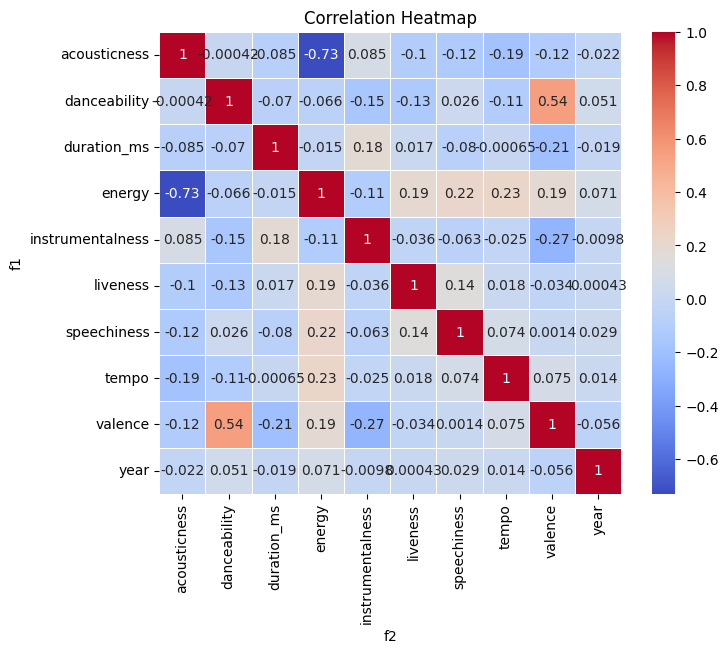

In [21]:
pivot_df = feature_correlations.pivot(index='f1', columns='f2', values='corr')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()